Student Name: Aidan Keeshan
Student ID:   18200117

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In the instructions implied that the data is stored in the python notebook. I have reviewed the source and there is no pickled data in the notebook. Generate the raw data for use in the processing. As random data will be different each run. 

For testing in octave the data generated in this step is exported to a matlab file for input.


In [3]:
import scipy.io
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
scipy.io.savemat('test.mat', dict(data=data))

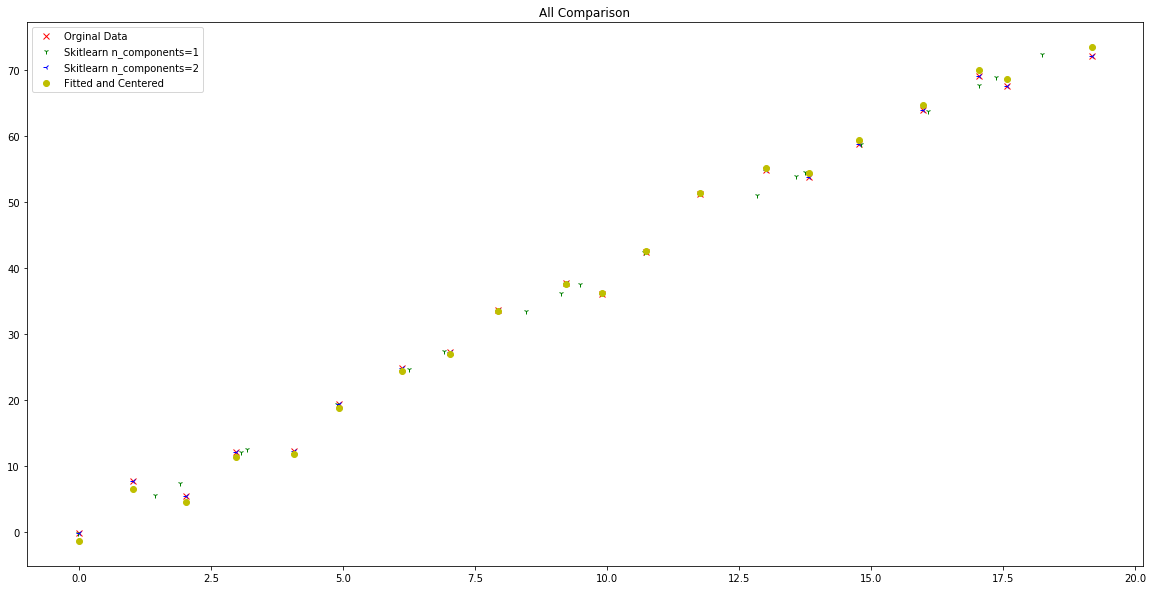

In [4]:
class pca_np:
    def __init__(self, data):
        self.data = data
        # Step 1: Get mean of x,y of data
        self.axis_mean = np.mean(data, axis=0)
        self.x_a = data[:,0]
        self.y_a = data[:,1]
        plt.rcParams["figure.figsize"] = (20,10)
    def fit(self,plot=True):
        # Step 2: Subtract Mean to adjust data
        self.data_adj = self.data - self.axis_mean
        # Step 3 Calcaulte Covariance Matrix
        self.covariance_matrix = np.cov(self.data, rowvar=False)
        # Step 3 Calcaulte eigenvectors and eigenvalues
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(self.covariance_matrix)
        origin = [0], [0] # the origin
        if plot:
            plt.quiver(*origin, *self.eigenvectors , color=['g'], scale=6, alpha=0.7)
            plt.show()
    def transform(self,plot=True):
        if not hasattr(self, 'data_adj'):
            self.fit(False)
        self.data_projected = self.eigenvectors.T.dot(self.data_adj.T).T
        self.eigenvalue_max = np.argmax(self.eigenvalues)
        if plot:
            plt.title("Transform")
            plt.plot(self.x_a, self.y_a, 'xr', label='Orginal Data')
            plt.plot(self.x_a, self.data_projected[:,self.eigenvalue_max], "1g", label='Fitted')
            plt.legend(loc='upper left')
            plt.show()
    def inverse_transform(self,plot=True):
        if not hasattr(self, 'eigenvalues'):
            self.transform(False)      
        self.data_projected += self.axis_mean
        self.y_pca = self.data_projected[:,self.eigenvalue_max]
        if plot:
            plt.title("Inverse Transform")
            plt.plot(self.x_a, self.y_a, 'xr', label='Orginal Data')
            plt.plot(self.x_a, self.y_pca, "1g", label='Fitted and Centered')
            plt.legend(loc='upper left')
            plt.show()
        #return self.y_pca
    def sklearn_pca(self,plot=True):
        for n in range(2):
            n += 1
            pca = PCA(n_components=n)
            pca.fit(self.data)
            data_pca = pca.transform(self.data)
            data_reduced = pca.inverse_transform(data_pca)
            if n == 1:
                self.x_skit_pca_n1 = data_reduced[:,0]
                self.y_skit_pca_n1 = data_reduced[:,1]
            else:
                self.x_skit_pca_n2 = data_reduced[:,0]
                self.y_skit_pca_n2 = data_reduced[:,1]
        if plot:
            plt.title("Skitlearn Comparison")
            plt.plot(self.x_a, self.y_a,'xr', label='Orginal Data')
            plt.plot(self.x_skit_pca_n1, self.y_skit_pca_n1 ,"1g", label='Skitlearn n_components=1')
            plt.plot(self.x_skit_pca_n2, self.y_skit_pca_n2 ,"3b", label='Skitlearn n_components=2')
            plt.legend(loc='upper left')
            plt.show()
    def compare_all(self):
        if not hasattr(self, 'x_skit_pca_n1'):
            self.sklearn_pca(False)
        if not hasattr(self, 'y_pca'):
            self.inverse_transform(False)
        plt.title("All Comparison")
        plt.plot(self.x_a, self.y_a,'xr', label='Orginal Data')
        plt.plot(self.x_skit_pca_n1, self.y_skit_pca_n1 ,"1g", label='Skitlearn n_components=1')
        plt.plot(self.x_skit_pca_n2, self.y_skit_pca_n2 ,"3b", label='Skitlearn n_components=2')
        plt.plot(self.x_a, self.y_pca, "oy", label='Fitted and Centered')
        plt.legend(loc='upper left')
        plt.show()

mypca = pca_np(data)
mypca.compare_all() 

For skitlearn where n=2 there is no difference in the plots. As the are 2 variable, there is no decomposition.  For the inverse transform performed using eigenvector and formula supplied there very little variation in plots. For the skitlearn where n_compemnts = 1 the plot looks worse. As noted in forums and skitlearn the pca code is using single value decomposition (SVD). This indicates for this particular problem pca using eigen vectors is better. 

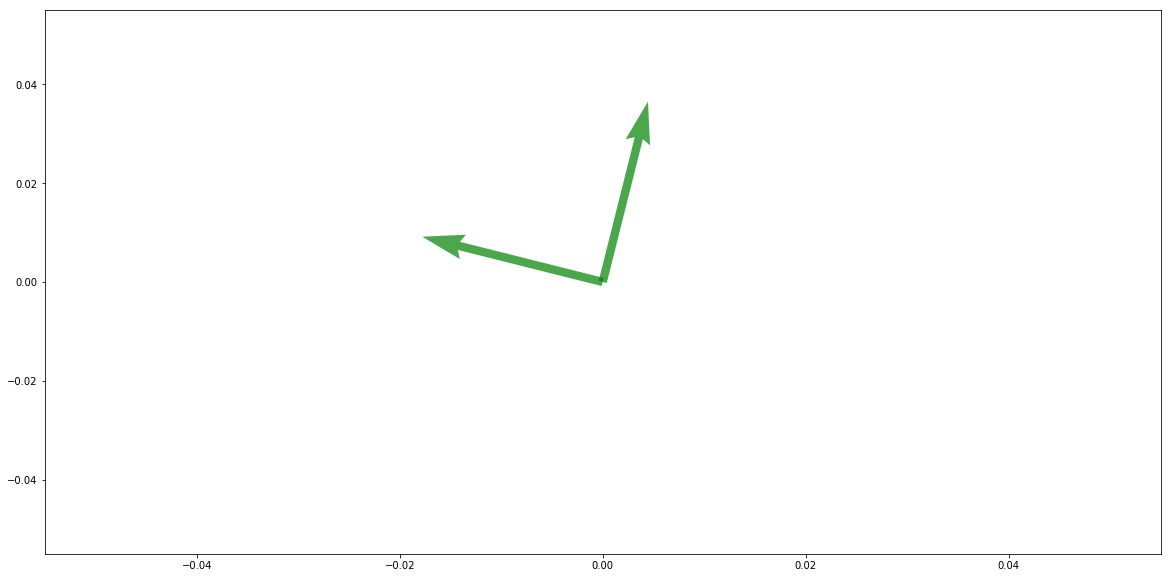

In [5]:
mypca.fit()

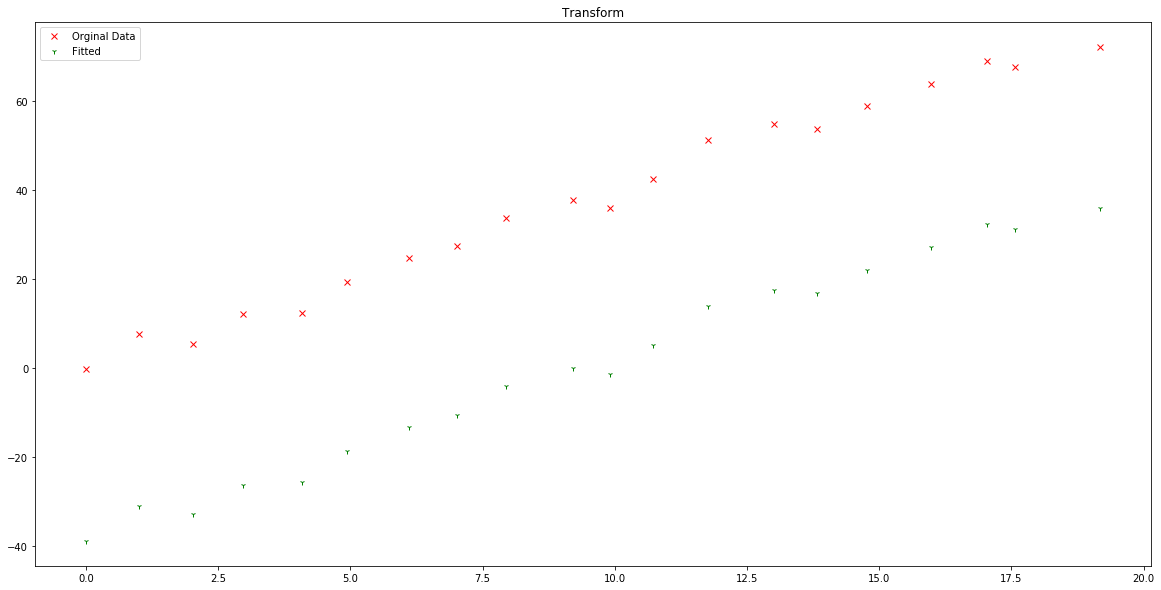

In [6]:
mypca.transform()

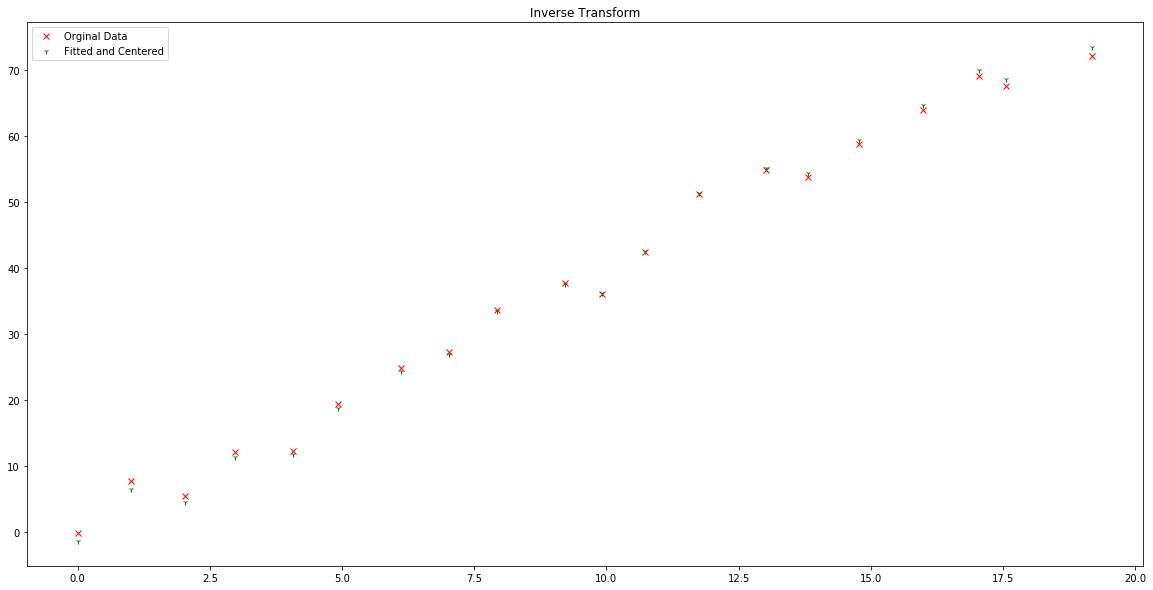

In [7]:
mypca.inverse_transform()

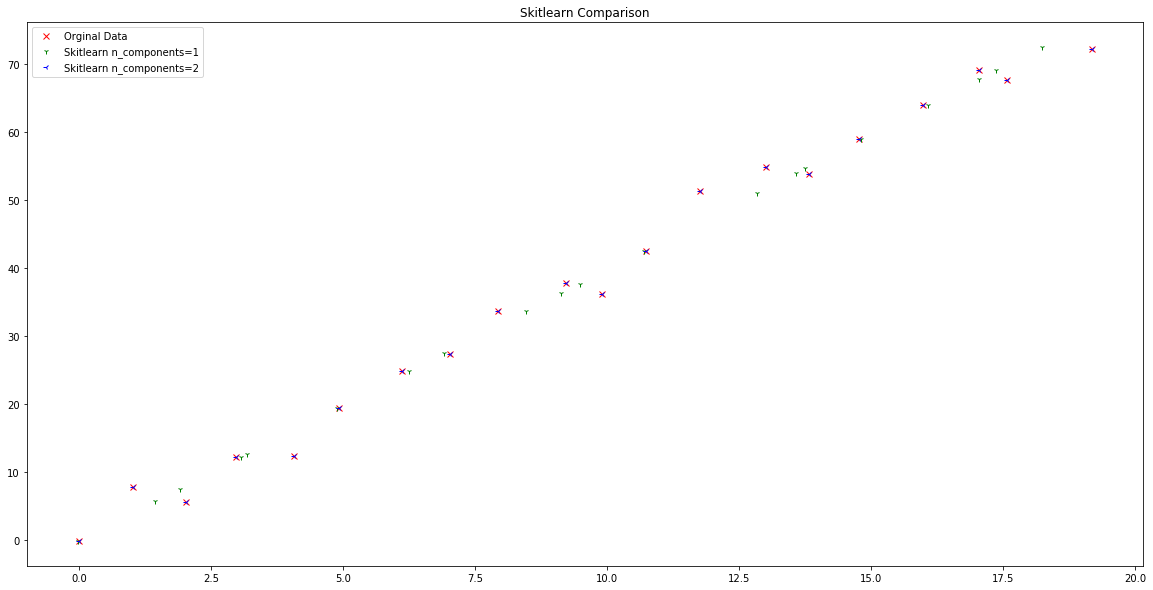

In [8]:
mypca.sklearn_pca()